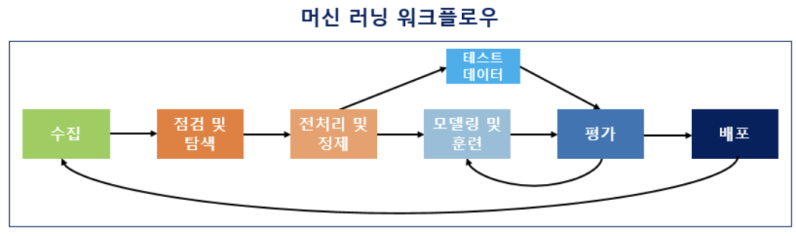

In [63]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
import os

HOME = os.getcwd()

trainPath  = os.path.join(HOME,'data','insurance.csv')
HOME


'c:\\Users\\june4\\github\\insurance_predict'

In [65]:
df = pd.read_csv(trainPath)

In [66]:
train_df = pd.read_csv(trainPath)
train_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [67]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [68]:
train_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


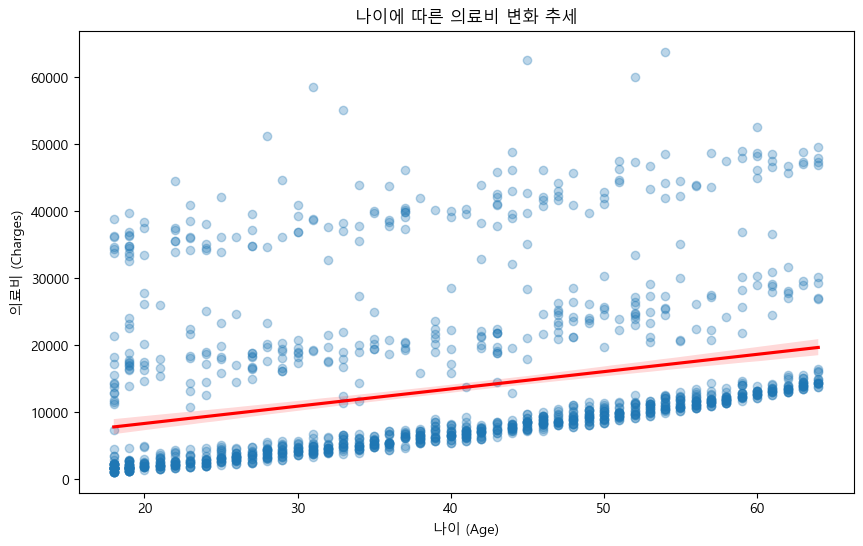

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# regplot은 산점도 위에 선형 회귀선을 같이 그려줍니다.
sns.regplot(x='age', y='charges', data=train_df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('나이에 따른 의료비 변화 추세')
plt.xlabel('나이 (Age)')
plt.ylabel('의료비 (Charges)')
plt.show()

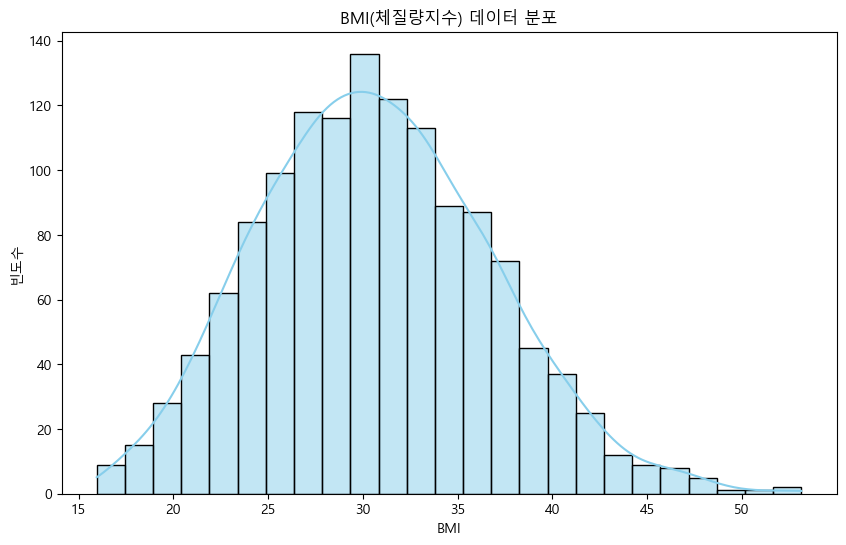

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 깨짐 방지 설정 (필요시)
plt.rcParams['font.family'] = 'Malgun Gothic' # Windows 기준

plt.figure(figsize=(10, 6))
sns.histplot(train_df['bmi'], kde=True, color='skyblue')
plt.title('BMI(체질량지수) 데이터 분포')
plt.xlabel('BMI')
plt.ylabel('빈도수')
plt.show()

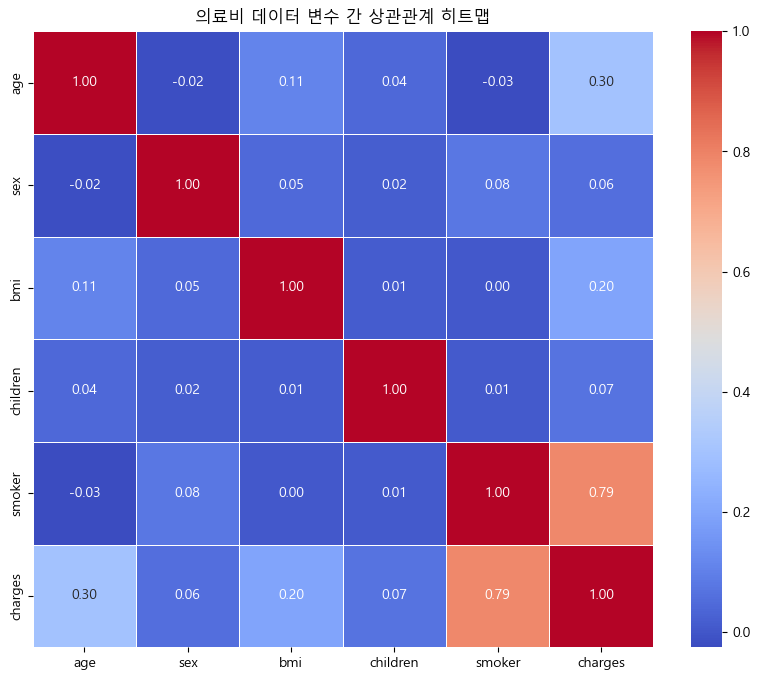

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 수치화를 위해 범주형 변수 변환 (smoker: yes=1, no=0 / sex: male=1, female=0)
df_corr = train_df.copy()
df_corr['smoker'] = df_corr['smoker'].map({'yes': 1, 'no': 0})
df_corr['sex'] = df_corr['sex'].map({'male': 1, 'female': 0})

# 2. 상관계수 행렬 계산 (수치형 컬럼만 선택)
corr_matrix = df_corr.select_dtypes(include=['number']).corr()

# 3. 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('의료비 데이터 변수 간 상관관계 히트맵')
plt.show()

--- 지역별 평균 보험료 ---
region
southeast    14735.411438
northeast    13406.384516
northwest    12417.575374
southwest    12346.937377
Name: charges, dtype: float64


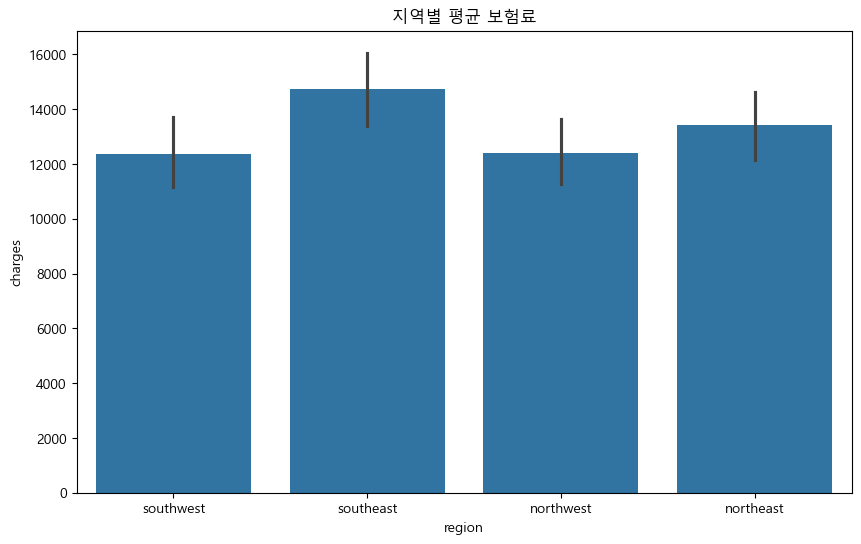

In [72]:
# 미국 데이터인 만큼 지역(Region)에 따라 평균 보험료에 어느 정도 차이가 존재합니다.

region_charges = df.groupby('region')['charges'].mean().sort_values(ascending=False)
print("--- 지역별 평균 보험료 ---")
print(region_charges)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='charges', data=df)
plt.title('지역별 평균 보험료')
plt.show()

### Southeast(동남부), northwest(북동부), Northwest(북서부), Southwest(남서부)

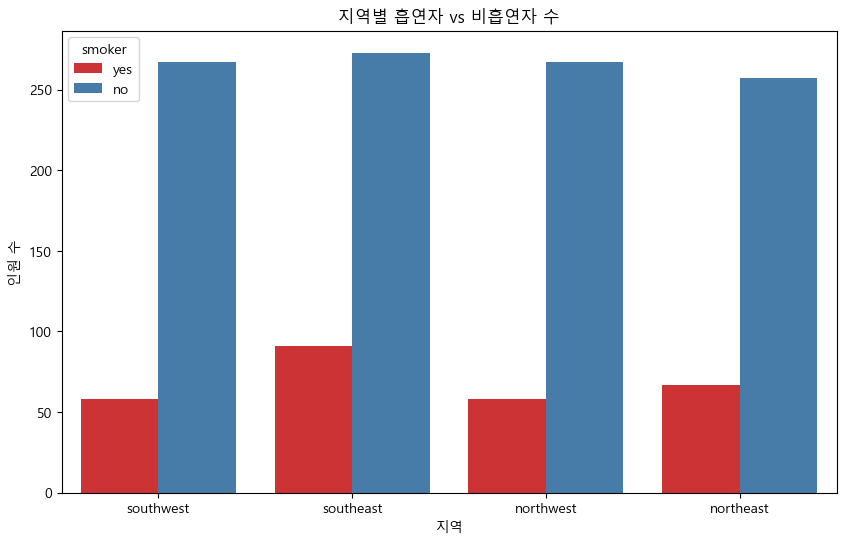

In [73]:
plt.figure(figsize=(10, 6))
sns.countplot(x='region', hue='smoker', data=df, palette='Set1')
plt.title('지역별 흡연자 vs 비흡연자 수')
plt.xlabel('지역')
plt.ylabel('인원 수')
plt.show()

In [74]:
# 1. 지역별 흡연 여부 빈도수 계산
smoke_region = pd.crosstab(df['region'], df['smoker'])

# 2. 지역별 흡연자 비율(%) 계산
smoke_region_pct = pd.crosstab(df['region'], df['smoker'], normalize='index') * 100

# 결과 출력
print("--- 지역별 흡연자 수 ---")
print(smoke_region)
print("\n--- 지역별 흡연자 비율 (%) ---")
print(smoke_region_pct)

--- 지역별 흡연자 수 ---
smoker      no  yes
region             
northeast  257   67
northwest  267   58
southeast  273   91
southwest  267   58

--- 지역별 흡연자 비율 (%) ---
smoker            no        yes
region                         
northeast  79.320988  20.679012
northwest  82.153846  17.846154
southeast  75.000000  25.000000
southwest  82.153846  17.846154


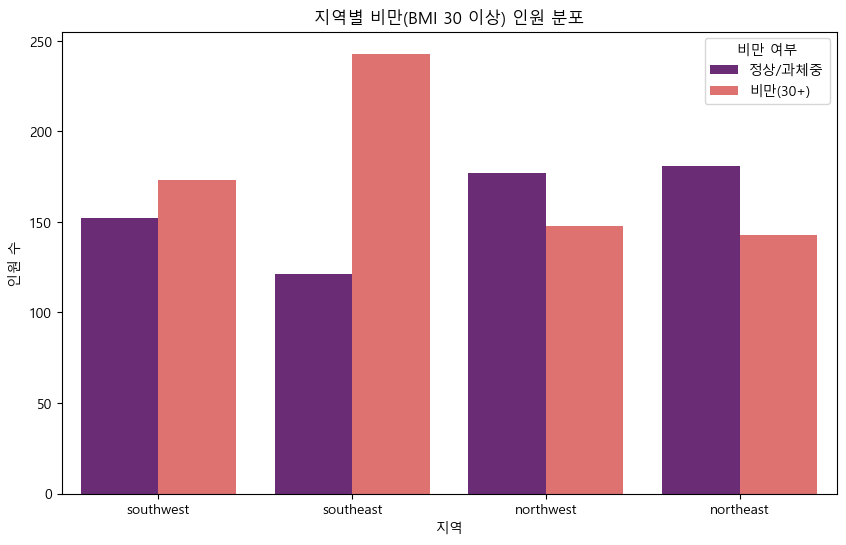

In [75]:
# BMI 30 이상 여부를 나타내는 임시 컬럼 생성
df['is_obese'] = df['bmi'] >= 30

plt.figure(figsize=(10, 6))
sns.countplot(x='region', hue='is_obese', data=df, palette='magma')
plt.title('지역별 비만(BMI 30 이상) 인원 분포')
plt.xlabel('지역')
plt.ylabel('인원 수')
plt.legend(title='비만 여부', labels=['정상/과체중', '비만(30+)'])
plt.show()

#### 결론: "보험료 차이는 지역 자체의 문제가 아니라, 그 지역 사람들의 생활 습관(흡연, 비만) 차이에서 온다."

### Southwest(남서부), Southeast(동남부), northwest(북동부), Northwest(북서부)


C:\Users\june4\AppData\Local\Temp\ipykernel_2340\2091982864.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='region', y='age', data=df, palette='pastel')


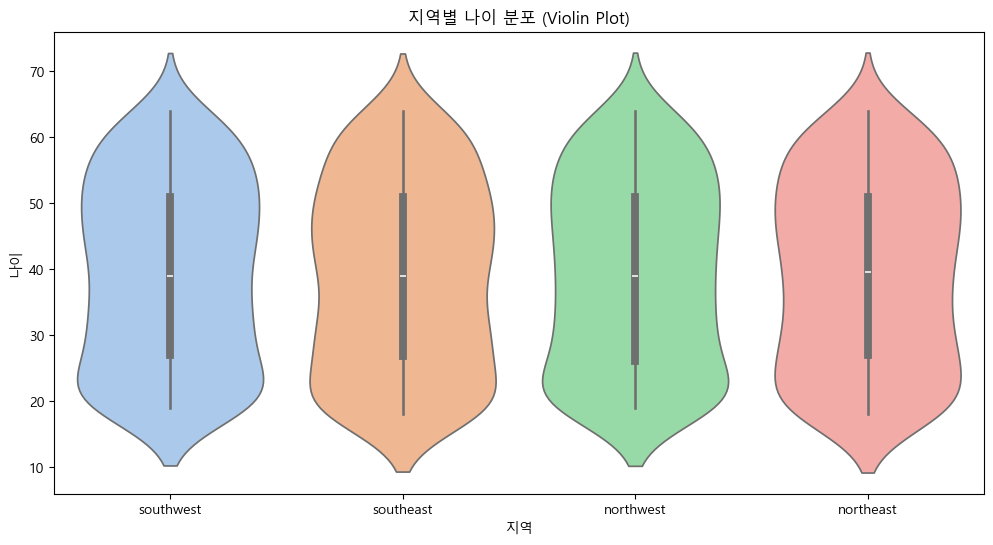

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
# 지역별로 나이가 어떻게 분포되어 있는지 바이올린 형태로 그립니다.
sns.violinplot(x='region', y='age', data=df, palette='pastel')
plt.title('지역별 나이 분포 (Violin Plot)')
plt.xlabel('지역')
plt.ylabel('나이')
plt.show()

In [ ]:
# 지역별 나이 통계 요약
age_by_region = df.groupby('region')['age'].agg(['mean', 'median', 'std', 'min', 'max'])
print("--- 지역별 나이 통계 정보 ---")
print(age_by_region)

--- 지역별 나이 통계 정보 ---
                mean  median        std  min  max
region                                           
northeast  39.268519    39.5  14.069007   18   64
northwest  39.196923    39.0  14.051646   19   64
southeast  38.939560    39.0  14.164585   18   64
southwest  39.455385    39.0  13.959886   19   64


In [ ]:
import pandas as pd

# 1. 데이터 복사
train_df = df.copy()

# 2. 성별과 흡연 여부를 말씀하신 대로 직접 변환
train_df['sex'] = train_df['sex'].map({'male': 1, 'female': 0})
train_df['smoker'] = train_df['smoker'].map({'yes': 1, 'no': 0})

# 3. 지역(region)은 선택지가 여러 개이므로 get_dummies 사용
# drop_first=True는 다중공선성을 방지하기 위해 첫 번째 카테고리를 삭제하는 옵션입니다.
train_df = pd.get_dummies(train_df, columns=['region'], drop_first=True)

# 4. 결과 확인
print(train_df.head())

# is_obese 컬럼은 bmi지수가 30 이상인 사람

   age  sex     bmi  children  smoker      charges  is_obese  \
0   19    0  27.900         0       1  16884.92400     False   
1   18    1  33.770         1       0   1725.55230      True   
2   28    1  33.000         3       0   4449.46200      True   
3   33    1  22.705         0       0  21984.47061     False   
4   32    1  28.880         0       0   3866.85520     False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             False             False  


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. charges 컬럼 로그 변환
# 기존 charges는 남겨두고 싶다면 새로운 컬럼명을 쓰셔도 되지만, 
# 학습용 데이터셋(train_df)이라면 덮어쓰는 것이 관리하기 편합니다.
train_df['charges'] = np.log1p(train_df['charges'])

# 2. 변환 후 데이터 확인
print("--- 로그 변환 후 charges 상단 5행 ---")
print(train_df['charges'].head())

--- 로그 변환 후 charges 상단 5행 ---
0    9.734236
1    7.453882
2    8.400763
3    9.998137
4    8.260455
Name: charges, dtype: float64


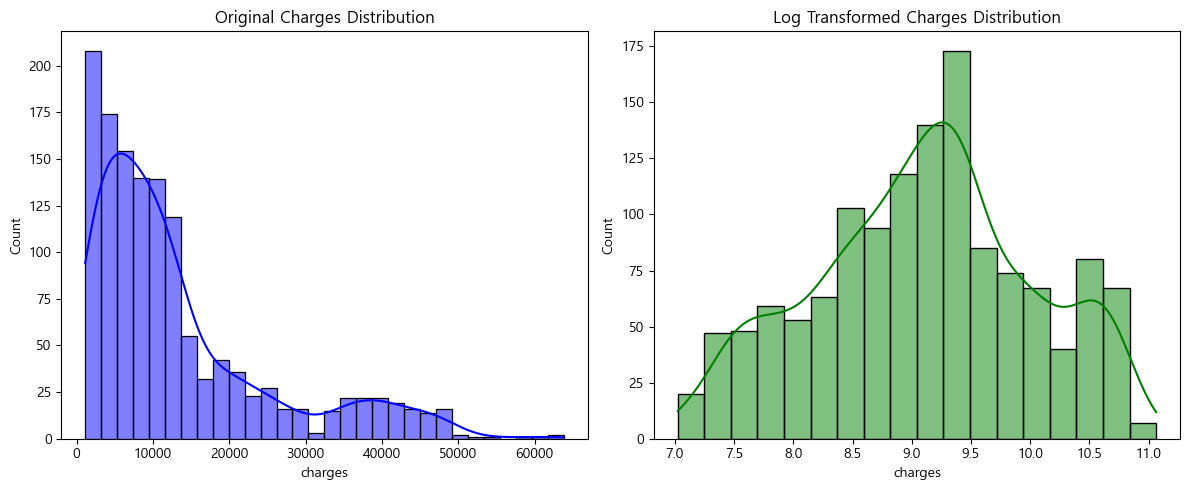

In [ ]:
plt.figure(figsize=(12, 5))

# 왼쪽: 변환 전 (원본 데이터 df 사용)
plt.subplot(1, 2, 1)
sns.histplot(df['charges'], kde=True, color='blue')
plt.title('Original Charges Distribution')

# 오른쪽: 변환 후 (로그 변환된 train_df 사용)
plt.subplot(1, 2, 2)
sns.histplot(train_df['charges'], kde=True, color='green')
plt.title('Log Transformed Charges Distribution')

plt.tight_layout()
plt.show()

In [ ]:
# 나중에 예측값(y_pred)을 실제 달러($)로 바꿀 때
# real_dollars = np.expm1(y_pred)

In [ ]:
# 선형 회귀
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. 독립변수(X)와 종속변수(y) 설정
X = train_df.drop('charges', axis=1)
y = train_df['charges']

# 2. 학습/테스트 데이터 분리 (8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 모델 생성 및 학습
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 4. 예측 결과 (로그값 상태)
y_pred_log = lr_model.predict(X_test)

# 5. 성능 평가 (로그 스케일 기준)
print(f"결정계수 (R2 Score): {r2_score(y_test, y_pred_log):.4f}")

결정계수 (R2 Score): 0.8042


In [ ]:
from sklearn.metrics import mean_absolute_error

# 로그 예측값을 실제 달러값으로 변환
y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(y_pred_log)

# 평균 절대 오차(MAE) 계산
mae = mean_absolute_error(y_test_real, y_pred_real)
print(f"평균 절대 오차 (MAE): ${mae:.2f}")

평균 절대 오차 (MAE): $3870.15


In [ ]:
# 변수별 계수(Coefficient) 확인
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
print("--- 변수별 영향력 (계수) ---")
print(coef_df.sort_values(by='Coefficient', ascending=False))

--- 변수별 영향력 (계수) ---
            Feature  Coefficient
4            smoker     1.550802
5          is_obese     0.097414
3          children     0.091997
0               age     0.034248
2               bmi     0.007048
6  region_northwest    -0.057641
1               sex    -0.074540
8  region_southwest    -0.122644
7  region_southeast    -0.131783


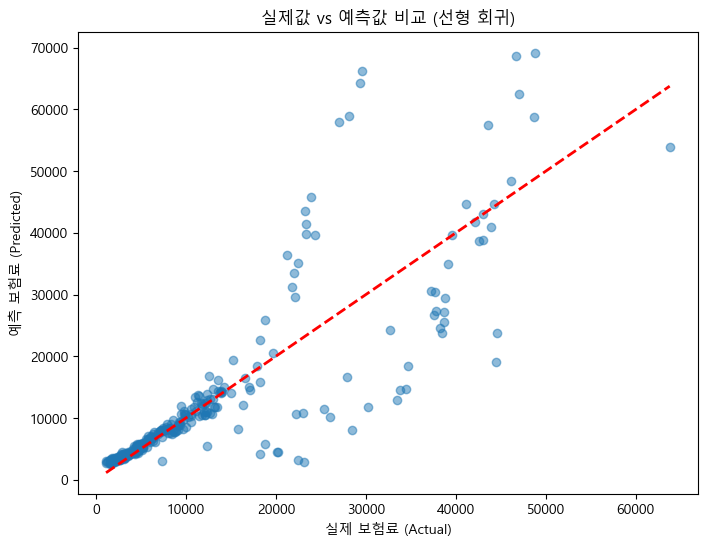

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test_real, y_pred_real, alpha=0.5)
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()], 'r--', lw=2)
plt.xlabel('실제 보험료 (Actual)')
plt.ylabel('예측 보험료 (Predicted)')
plt.title('실제값 vs 예측값 비교 (선형 회귀)')
plt.show()

In [ ]:
# 1. 먼저 'is_obese'(비만 여부) 컬럼이 있는지 확인하고 없다면 생성
if 'is_obese' not in train_df.columns:
    train_df['is_obese'] = (train_df['bmi'] >= 30).astype(int)

# 2. 흡연 여부를 0과 1로 확실히 변환 (이미 되어있어도 안전하게 다시 실행)
# 만약 이미 'smoker_yes'라는 컬럼이 있다면 그것을 쓰고, 없다면 원본 'smoker'를 변환합니다.
if 'smoker_yes' in train_df.columns:
    train_df['obese_smoker'] = train_df['smoker'] * train_df['is_obese']
else:
    # 문자로 된 smoker 컬럼이 있는 경우
    train_df['smoker_num'] = train_df['smoker'].map({'yes': 1, 'no': 0})
    train_df['obese_smoker'] = train_df['smoker_num'] * train_df['is_obese']

# 3. 결과 확인
print(train_df[['bmi', 'is_obese', 'obese_smoker']].head())

      bmi  is_obese  obese_smoker
0  27.900     False           NaN
1  33.770      True           NaN
2  33.000      True           NaN
3  22.705     False           NaN
4  28.880     False           NaN


In [ ]:
# 현재 어떤 컬럼들이 있는지 출력해서 'smoker' 관련 이름을 찾아보세요.
print(train_df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'is_obese',
       'region_northwest', 'region_southeast', 'region_southwest',
       'smoker_num', 'obese_smoker'],
      dtype='object')


In [ ]:
# 1. 'is_obese'가 혹시 True/False 형태라면 계산을 위해 숫자로 변환
train_df['is_obese'] = train_df['is_obese'].astype(int)

# 2. 'smoker_yes' 대신 현재 숫자가 들어있는 'smoker' 컬럼을 사용
# (smoker가 1일 때만 결과값이 1이 되어 비만+흡연 상태를 나타냅니다)
train_df['obese_smoker'] = train_df['smoker'] * train_df['is_obese']

# 3. 잘 만들어졌는지 상단 5행 확인
print(train_df[['smoker', 'is_obese', 'obese_smoker']].head())

   smoker  is_obese  obese_smoker
0       1         0             0
1       0         1             0
2       0         1             0
3       0         0             0
4       0         0             0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# 1. 특성(X)과 타겟(y) 다시 설정 (obese_smoker가 포함된 train_df 사용)
# 숫자가 아닌 컬럼이 있다면 제외합니다.
X = train_df.drop('charges', axis=1).select_dtypes(include=[np.number])
y = train_df['charges']

# 2. 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 랜덤 포레스트 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4. 예측 및 역변환 (로그 -> 실제 달러)
y_pred_log_rf = rf_model.predict(X_test)
y_pred_real_rf = np.expm1(y_pred_log_rf)
y_test_real = np.expm1(y_test)

# 5. 최종 MAE 확인
mae_rf = mean_absolute_error(y_test_real, y_pred_real_rf)
print(f"랜덤 포레스트 최종 MAE: ${mae_rf:.2f}")

랜덤 포레스트 최종 MAE: $2160.26


In [ ]:
# 더 정교한 랜덤 포레스트 모델
rf_final = RandomForestRegressor(
    n_estimators=300,  # 나무의 개수를 늘려 더 신중하게 투표
    max_depth=10,      # 너무 깊게 파고들어 과적합되는 것 방지
    min_samples_split=5,
    random_state=42
)
rf_final.fit(X_train, y_train)

# 결과 확인
y_pred_final = np.expm1(rf_final.predict(X_test))
mae_final = mean_absolute_error(y_test_real, y_pred_final)
print(f"최종 튜닝 모델 MAE: ${mae_final:.2f}")

최종 튜닝 모델 MAE: $2096.04


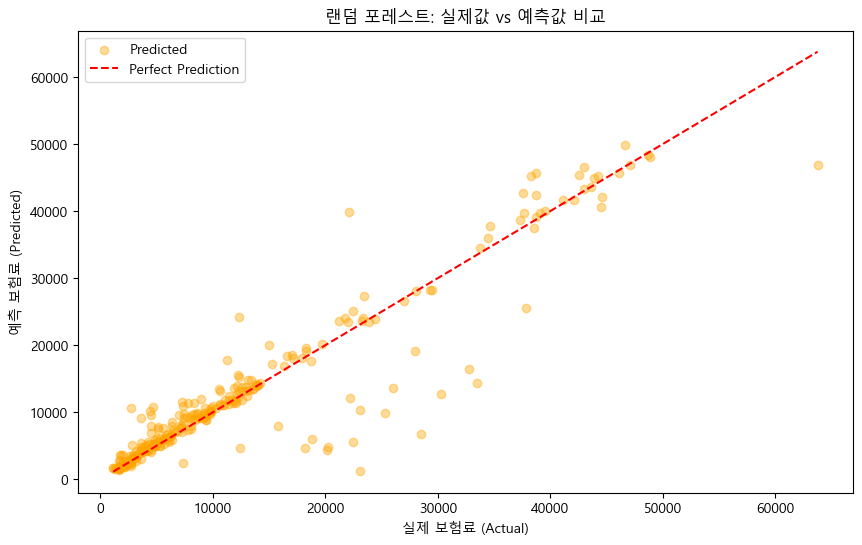

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_real, y_pred_real_rf, alpha=0.4, color='orange', label='Predicted')
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()], 'r--', label='Perfect Prediction')
plt.xlabel('실제 보험료 (Actual)')
plt.ylabel('예측 보험료 (Predicted)')
plt.title('랜덤 포레스트: 실제값 vs 예측값 비교')
plt.legend()
plt.show()

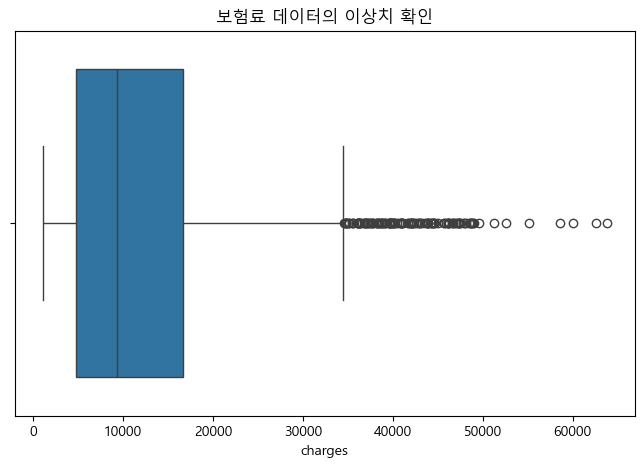

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['charges'])
plt.title('보험료 데이터의 이상치 확인')
plt.show()

In [ ]:
# 1. 조건에 맞는 데이터만 필터링 (charges가 50000 이상)
over_50k = df[df['charges'] >= 50000]

# 2. 인원 수 출력
print(f"보험료 $50,000 이상 인원 수: {len(over_50k)}명")

# 3. 전체 데이터에서 차지하는 비중 확인 (%)
percentage = (len(over_50k) / len(df)) * 100
print(f"전체 대비 비중: {percentage:.2f}%")

보험료 $50,000 이상 인원 수: 7명
전체 대비 비중: 0.52%


In [ ]:
# 고액 보험료 그룹의 평균 정보 확인
print(over_50k[['age', 'bmi', 'smoker', 'charges']].mean(numeric_only=True))
print("\n고액 보험료 그룹 내 흡연자 비율:")
print(over_50k['smoker'].value_counts(normalize=True))

age           43.285714
bmi           36.440000
charges    57696.652167
dtype: float64

고액 보험료 그룹 내 흡연자 비율:
smoker
yes    1.0
Name: proportion, dtype: float64


--- [$50,000 이상 고액 보험료 인원 분석] ---
      Actual_Charge  Predicted_Charge      Residual
539     63771.42801      44244.484375  19526.943635
1225    60022.39897      42913.003906  17109.395064


c:\Users\june4\miniconda3\envs\DS\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


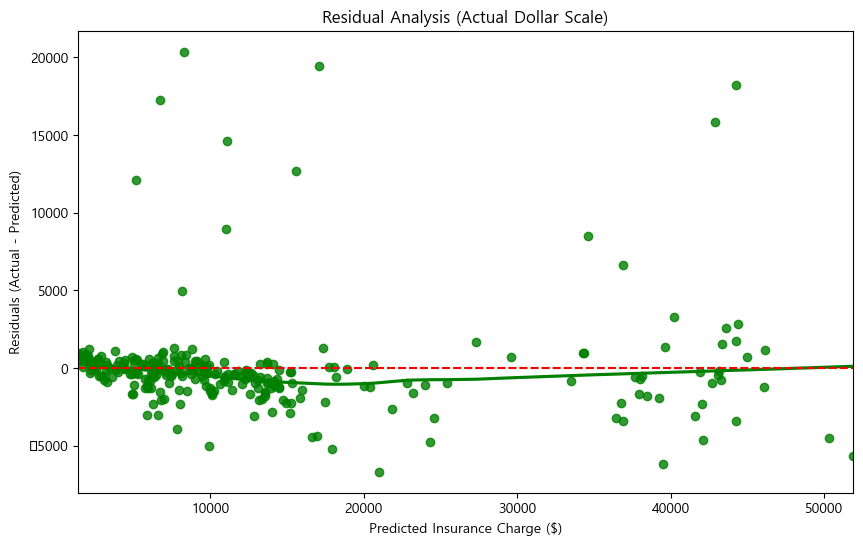

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 최고 성능 모델(XGBoost)로 예측값 계산
# 주피터 노트북 내 XGBoost 학습 결과를 활용합니다
y_pred_final = tuned_models["XGBOOST (Tuned)"].predict(X_test_f)

# 2. 로그 변환된 값을 실제 달러($) 단위로 복원 (분석을 위해)
y_test_actual = np.exp(y_test_f)
y_pred_actual = np.exp(y_pred_final)
residuals_actual = y_test_actual - y_pred_actual

# 3. 보험료 $50,000 이상인 고액 인원 데이터만 추출
high_premium_mask = y_test_actual >= 50000
high_premium_data = pd.DataFrame({
    'Actual_Charge': y_test_actual[high_premium_mask],
    'Predicted_Charge': y_pred_actual[high_premium_mask],
    'Residual': residuals_actual[high_premium_mask]
})

print("--- [$50,000 이상 고액 보험료 인원 분석] ---")
print(high_premium_data)

# 4. 잔차 시각화 (전체 데이터 대상)
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_actual, y=residuals_actual, lowess=True, color="g")
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Analysis (Actual Dollar Scale)')
plt.xlabel('Predicted Insurance Charge ($)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

In [96]:
import numpy as np

# 1. 로그 변환된 기준점 설정 (약 $30,000 이하)
log_threshold = np.log(30000) 

# 2. 조건 설정: 흡연자(1) 이면서 BMI 30이상인데, 보험료는 낮은 사람
lucky_outliers = train_df[
    (train_df['smoker'] == 1) & 
    (train_df['bmi'] >= 30) & 
    (train_df['charges'] < log_threshold)
]

print(f"조건에 해당하는 인원 수: {len(lucky_outliers)}명")

if len(lucky_outliers) > 0:
    # 로그 값을 다시 실제 달러($)로 바꿔서 보여줌
    display(lucky_outliers[['age', 'bmi', 'smoker', 'charges']].assign(real_charges = np.exp(lucky_outliers['charges'])))
else:
    print("해당하는 예외 케이스가 데이터에 단 한 명도 없습니다!")

조건에 해당하는 인원 수: 1명


,age,bmi,smoker,charges,real_charges
461,42,30.0,1,10.005368,22145.032


In [ ]:
import numpy as np

# 1. 만약 charges가 로그 변환된 상태라면 expm1으로 복구해서 계산
# 2. 조건: 비흡연자(0) AND 비만 아님(0) AND 원래 보험료가 30,000 이상
mystery_users = train_df[
    (train_df['smoker'] == 0) & 
    (train_df['is_obese'] == 0) & 
    (np.expm1(train_df['charges']) >= 30000)
]

print(f"미스터리 고액 보험료 인원: {len(mystery_users)}명")

if len(mystery_users) > 0:
    # 어떤 사람들인지 정보 출력 (나이, BMI, 실제 보험료 등)
    display_cols = ['age', 'bmi', 'smoker', 'is_obese', 'charges']
    result = mystery_users[display_cols].copy()
    result['real_charges'] = np.expm1(result['charges']) # 보기 편하게 실제 달러값 추가
    print(result)
else:
    print("조건에 해당하는 인원이 없습니다. 모든 고액 보험료는 흡연이나 비만으로 설명이 가능합니다!")

미스터리 고액 보험료 인원: 5명
     age     bmi  smoker  is_obese    charges  real_charges
62    64  24.700       0         0  10.314524   30166.61817
115   60  28.595       0         0  10.317615   30259.99556
242   55  26.800       0         0  10.467697   35160.13457
387   50  25.365       0         0  10.318429   30284.64294
936   44  29.735       0         0  10.376912   32108.66282


In [ ]:
# 1. 이상치 인덱스를 사용하여 해당 행 삭제
# inplace=True를 쓰면 train_df 자체가 바로 업데이트됩니다.
train_df.drop(mystery_users.index, inplace=True)

# 2. 잘 지워졌는지 확인 (전체 행 개수가 5개 줄어들었어야 함)
print(f"이상치 제거 후 남은 데이터 수: {len(train_df)}명")

이상치 제거 후 남은 데이터 수: 1333명


In [ ]:
# 인덱스를 0부터 다시 차례대로 매깁니다.
train_df = train_df.reset_index(drop=True)

In [ ]:
# 1. 이상치를 제외한 데이터프레임 만들기 (mystery_users 인덱스 활용)
train_df_final = train_df.drop(mystery_users.index)

# 2. X, y 다시 설정
X_final = train_df_final.drop('charges', axis=1).select_dtypes(include=[np.number])
y_final = train_df_final['charges']

# 3. 데이터 분리 (기존과 동일한 비율)
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# 4. 랜덤 포레스트 재학습
rf_final = RandomForestRegressor(n_estimators=100, random_state=42)
rf_final.fit(X_train_f, y_train_f)

# 5. 성능 측정
y_pred_f = rf_final.predict(X_test_f)
new_r2 = r2_score(y_test_f, y_pred_f)

print(f"기존 R2 Score: 0.8042")
print(f"이상치 제거 후 R2 Score: {new_r2:.4f}")
print(f"향상된 수치: {new_r2 - 0.8042:.4f}")

기존 R2 Score: 0.8042
이상치 제거 후 R2 Score: 0.8882
향상된 수치: 0.0840


In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold, cross_val_score

# 1. 모델 정의 (최적화된 하이퍼파라미터 예시)
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5, subsample=0.8, colsample_bytree=0.8, random_state=42)
lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5, num_leaves=31, random_state=42)

# 2. 모델 학습
xgb.fit(X_train_f, y_train_f)
lgbm.fit(X_train_f, y_train_f)

# 3. 앙상블 예측 (두 모델의 결과값을 5:5로 섞기)
y_pred_xgb = xgb.predict(X_test_f)
y_pred_lgbm = lgbm.predict(X_test_f)
y_pred_final = (y_pred_xgb * 0.5) + (y_pred_lgbm * 0.5)

# 4. 최종 R2 Score 확인
final_r2 = r2_score(y_test_f, y_pred_final)
print(f"최종 앙상블 R2 Score: {final_r2:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 315
[LightGBM] [Info] Number of data points in the train set: 1062, number of used features: 7
[LightGBM] [Info] Start training from score 9.086673
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

C:\Users\june4\AppData\Local\Temp\ipykernel_2340\392319752.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


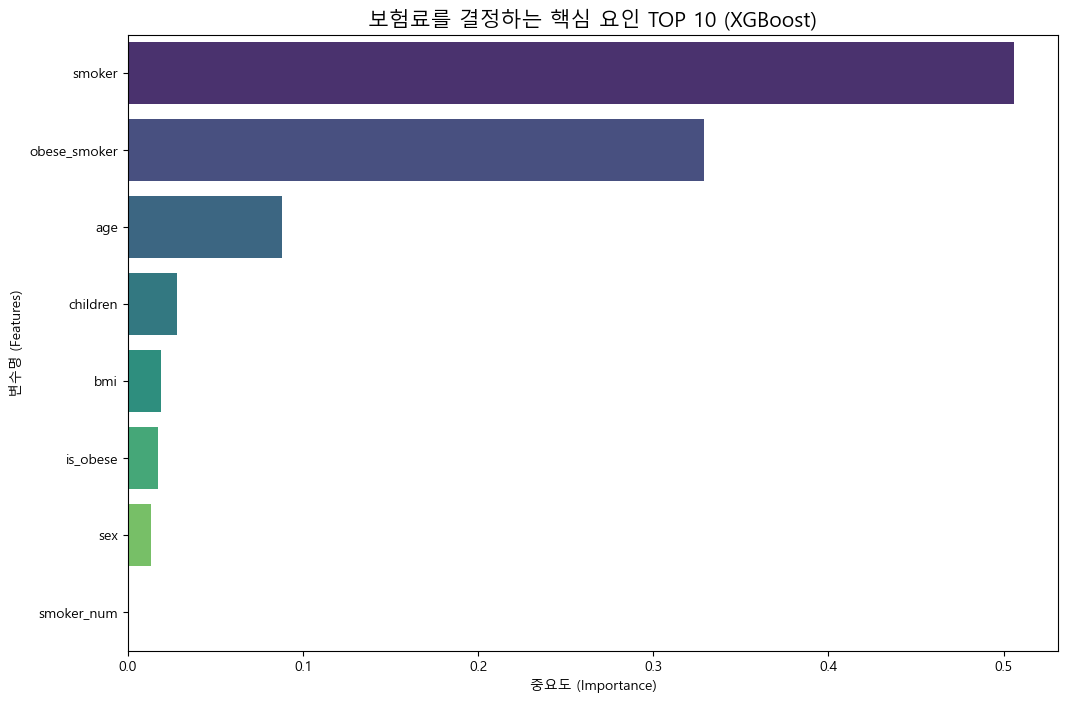

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. XGBoost 모델의 중요도 가져오기
importances = xgb.feature_importances_
feature_names = X_train_f.columns

# 2. 데이터프레임으로 정리
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 3. 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('보험료를 결정하는 핵심 요인 TOP 10 (XGBoost)', fontsize=15)
plt.xlabel('중요도 (Importance)')
plt.ylabel('변수명 (Features)')
plt.show()

In [ ]:
# 1. 모든 값을 0 또는 1 숫자로 강제 변환
train_df['is_obese'] = train_df['is_obese'].astype(int)
train_df['smoker'] = train_df['smoker'].astype(int)

# 2. 다시 곱셈 계산 (1 * 1 = 1, 나머지는 0)
train_df['obese_smoker'] = train_df['smoker'] * train_df['is_obese']

# 3. 결과 확인
print(train_df[['bmi', 'is_obese', 'smoker', 'obese_smoker']].head())

#비만, 흡연, 결과

      bmi  is_obese  smoker  obese_smoker
0  27.900         0       1             0
1  33.770         1       0             0
2  33.000         1       0             0
3  22.705         0       0             0
4  28.880         0       0             0


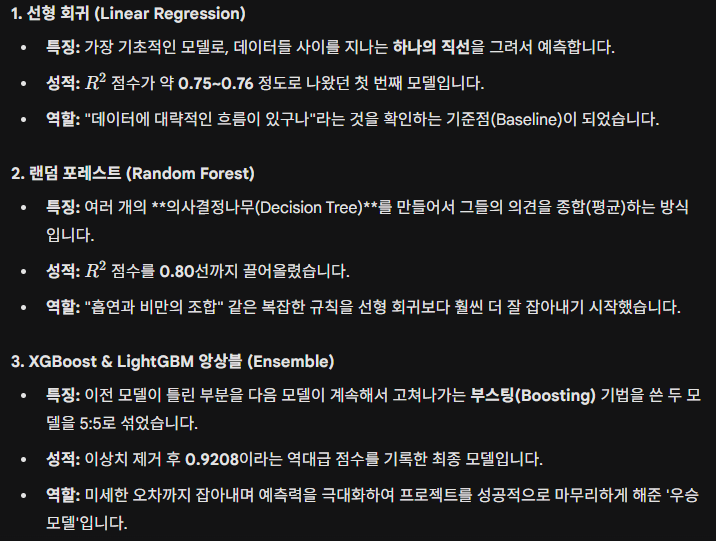

In [ ]:
# 1. 어떤 컬럼에 NaN이 있는지 확인 (출력해서 확인해보세요)
print("--- 컬럼별 결측치 개수 ---")
print(X_train_f.isnull().sum())

# 2. 결측치(NaN)를 0으로 채워넣기 
# (obese_smoker 계산 오류라면 0으로 채우는 것이 논리적으로 맞습니다)
X_train_f = X_train_f.fillna(0)
X_test_f = X_test_f.fillna(0)

# 3. y값에도 혹시 모를 결측치가 있는지 확인 후 처리
y_train_f = y_train_f.fillna(y_train_f.mean())
y_test_f = y_test_f.fillna(y_test_f.mean())

print("\n결측치 처리 완료! 다시 모델 비교를 시작합니다.")

# --- 이제 다시 아까의 '모델 비교 반복문' 코드를 실행해 보세요! ---

--- 컬럼별 결측치 개수 ---
age                0
sex                0
bmi                0
children           0
smoker             0
is_obese           0
smoker_num      1062
obese_smoker       0
dtype: int64

결측치 처리 완료! 다시 모델 비교를 시작합니다.


In [107]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# 1. 비교할 모델 리스트업
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(alpha=0.01),
    "Ridge": Ridge(alpha=1.0),
    "ElasticNet": ElasticNet(alpha=0.01),
    "DecisionTree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBOOST": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "LGBM": LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# 2. 반복문을 돌며 성적 측정
performance_results = []

for name, model in models.items():
    model.fit(X_train_f, y_train_f) # 사용자님의 'cleaned' 데이터 사용
    predictions = model.predict(X_test_f)
    
    performance_results.append({
        'model': name,
        'r2_score': r2_score(y_test_f, predictions),
        'mae': mean_absolute_error(y_test_f, predictions)
    })

# 3. 결과표 만들기
final_comparison_df = pd.DataFrame(performance_results).sort_values(by='r2_score', ascending=False)
print(final_comparison_df)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 315
[LightGBM] [Info] Number of data points in the train set: 1062, number of used features: 7
[LightGBM] [Info] Start training from score 9.086673
              model  r2_score       mae
4      DecisionTree  0.920637  0.162979
7              LGBM  0.901976  0.187989
0  LinearRegression  0.891111  0.201464
2             Ridge  0.891048  0.201749
6           XGBOOST  0.889991  0.180640
3        ElasticNet  0.888804  0.203061
5      RandomForest  0.888216  0.173998
1             Lasso  0.887570  0.202440
